In [1]:
###########################################
# --------------------------------------- #
# Introduccion a Pandas, Jupyter y Python #
# --------------------------------------- #
#
# __________Jessica Isamar Uriarte Garcia #
# _____________________ 7 de Febrero 2018 #
###########################################


# Cargamos las bibliotecas necesarias al a memoria de trabajo

##### Para manejo de datos
import pandas as pd
##### Numerical python
import numpy as np
##### Graficas Matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from math import pi

In [2]:
from windrose import WindroseAxes

In [3]:
# Cargamos la base de datos, ya editada en emacs (si es necesario) y lista para trabajarse
df0=pd.read_csv('BDrioc.txt',sep='\s+')
# Vemos la base de datos empezando de arriba (head)
df0.head()

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RAD-SOL
0,05/02/2018,15:30,127,138,4.3,6.0,14.1,45,1012.0,0.0,137.0
1,05/02/2018,15:40,107,122,4.3,7.0,14.7,44,1012.2,0.0,159.0
2,05/02/2018,15:50,113,116,5.1,7.5,15.0,43,1012.4,0.0,206.0
3,05/02/2018,16:00,129,140,4.9,7.8,15.6,42,1012.5,0.0,215.0
4,05/02/2018,16:10,111,118,4.5,7.2,16.4,41,1012.6,0.0,274.0


In [4]:
# Le damos la estructura de datos
df=pd.DataFrame(df0)
# Vemos los tipos de datos 
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS            int64
DIRR            int64
VELS          float64
VELR          float64
TEMP          float64
HR              int64
PB            float64
PREC          float64
RAD-SOL       float64
dtype: object

In [5]:
# La fecha y la hora son del tipo "object" y no se pueden trabajar asi
# Se juntan en una sola columna y lo cambiamos para que Pandas lo reconozca como "datetime"
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
# Se borran las primeras dos columnas ya que no se ocupan.
df=df.drop(['DD/MM/AAAA','HH:MM'],1)
# La nueva columna FECHA se recorre al final de la tabla

In [6]:
# Revisamos que Pandas reconozca la columna FECHA como 'datetime'
df.dtypes

DIRS                int64
DIRR                int64
VELS              float64
VELR              float64
TEMP              float64
HR                  int64
PB                float64
PREC              float64
RAD-SOL           float64
FECHA      datetime64[ns]
dtype: object

In [7]:
# En df_tmp guardamos las temperaturas mayores a 24
df_tmp = df[df.TEMP > 24] 
# Le llamamos df_select a las temperaturas en df_tmp que sean menores a 25
df_select = df_tmp[df_tmp.TEMP < 25]
# Podemos ver que se guardó la info donde las temperaturas estan entre 24 y 25
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RAD-SOL,FECHA
18,190,242,5.0,9.7,24.1,29,1012.0,0.0,617.0,2018-02-05 18:30:00
19,169,173,5.7,8.9,24.4,29,1011.9,0.0,621.0,2018-02-05 18:40:00
20,158,204,5.7,9.2,24.9,28,1011.8,0.0,683.0,2018-02-05 18:50:00
59,279,290,7.1,9.7,24.8,28,600.0,0.0,0.0,2018-02-06 01:20:00


In [8]:
# Si queremos ver los promedios de cada columna de cualquier tipo de dato (menos 'datetime' porque no tendría sentido)
df.mean()

DIRS       167.643357
DIRR       195.097902
VELS         7.044056
VELR        10.680420
TEMP        19.823077
HR          41.391608
PB         935.041958
PREC         0.000000
RAD-SOL    185.720280
dtype: float64

In [9]:
# Si solo ocupamos el promedio de la temperatra 
df.TEMP.mean()

19.823076923076922

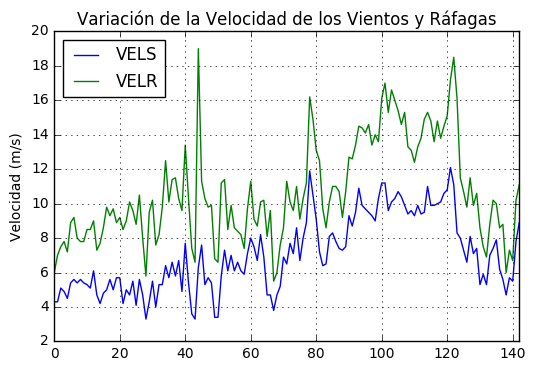

In [10]:
# Gráfica de la velocidad de los vientos y ráfagas
df_vel=df[['VELS','VELR']]
plt.figure(); df_vel.plot(); plt.legend(loc='best')
plt.title("Variación de la Velocidad de los Vientos y Ráfagas")
plt.ylabel("Velocidad (m/s)")
plt.grid(True)
plt.show()

In [11]:
df_vel.head(130)

,VELS,VELR
0,4.3,6.0
1,4.3,7.0
2,5.1,7.5
3,4.9,7.8
4,4.5,7.2
5,5.4,8.9
6,5.6,9.2
7,5.4,8.0
8,5.6,7.8
9,5.4,7.8


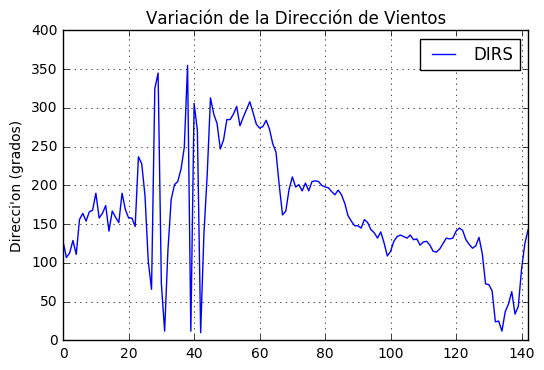

In [12]:
# Gráfica de la dirección de vientos
df_dirtemp=df[['DIRS','FECHA']]
plt.figure(); df_dirtemp.plot(); plt.legend(loc='best')
plt.title("Variación de la Dirección de Vientos")
plt.ylabel("Direcci\'on (grados)")
plt.grid(True)
plt.show()

In [13]:
df_dirtemp.head(82)

,DIRS,FECHA
0,127,2018-02-05 15:30:00
1,107,2018-02-05 15:40:00
2,113,2018-02-05 15:50:00
3,129,2018-02-05 16:00:00
4,111,2018-02-05 16:10:00
5,156,2018-02-05 16:20:00
6,164,2018-02-05 16:30:00
7,154,2018-02-05 16:40:00
8,166,2018-02-05 16:50:00
9,168,2018-02-05 17:00:00


In [14]:
# Le cambié de nombre a la columna RAD-SOL a RAD porque el guión estaba haciendo ruido.
df= df.rename(columns={'RAD-SOL':'RAD'})

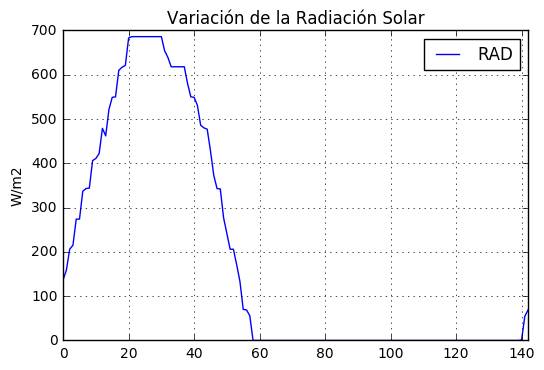

In [15]:
# Gráfica de radiación solar
plt.figure(); df.RAD.plot(); plt.legend(loc='best')
plt.title("Variación de la Radiación Solar")
plt.ylabel("W/m2")
plt.grid(True)
plt.show()

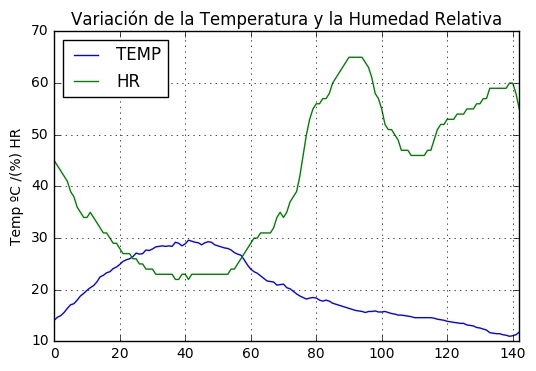

In [16]:
# Gráfica de la temperatura y la humedad relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

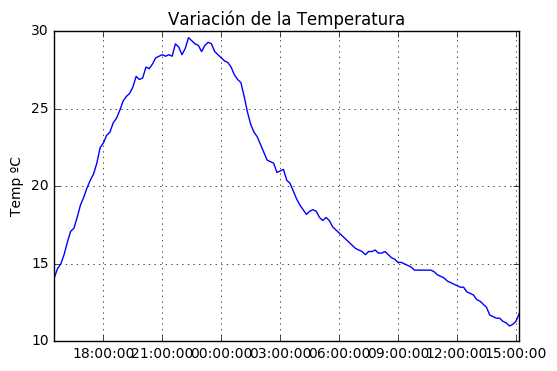

In [17]:
# Gráfica de la variación de la temperatura
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

In [18]:
df.HR.describe()

count    143.000000
mean      41.391608
std       14.394363
min       22.000000
25%       27.000000
50%       42.000000
75%       55.000000
max       65.000000
Name: HR, dtype: float64

In [19]:
df.TEMP.describe()

count    143.000000
mean      19.823077
std        5.886613
min       11.000000
25%       14.850000
50%       18.400000
75%       25.800000
max       29.600000
Name: TEMP, dtype: float64

In [20]:
# Analizamos la media, desviación estándar, mínimos/máximos y cuartiles de cada columna en la base de datos
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RAD
count,143.000000,143.000000,143.000000,143.00000,143.000000,143.000000,143.000000,143.0,143.00000
mean,167.643357,195.097902,7.044056,10.68042,19.823077,41.391608,935.041958,0.0,185.72028
std,74.672186,79.020439,2.170987,2.93455,5.886613,14.394363,148.229813,0.0,256.58506
min,10.000000,33.000000,3.300000,5.50000,11.000000,22.000000,600.000000,0.0,0.00000
25%,126.500000,138.000000,5.350000,8.60000,14.850000,27.000000,969.800000,0.0,0.00000
50%,156.000000,174.000000,6.700000,10.10000,18.400000,42.000000,1008.800000,0.0,0.00000
75%,204.000000,241.000000,8.900000,12.90000,25.800000,55.000000,1010.200000,0.0,408.50000
max,355.000000,360.000000,12.100000,19.00000,29.600000,65.000000,1012.600000,0.0,686.00000


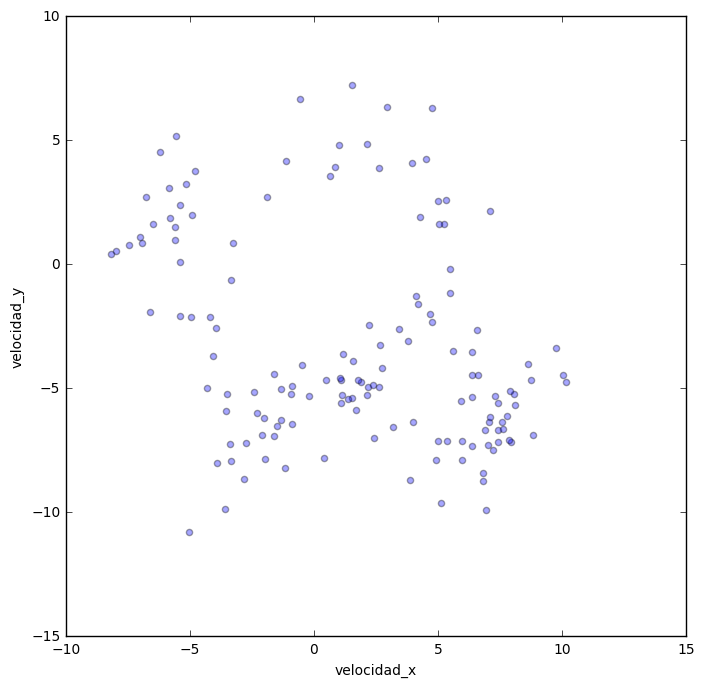

In [21]:
# Nube de puntos velocidad x y velocidad y
df['velocidad_x'] = df['VELS'] * np.sin(df['DIRS'] * pi / 180.0)
df['velocidad_y'] = df['VELS'] * np.cos(df['DIRS'] * pi / 180.0)
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect('equal')
_ = df.plot(kind='scatter', x='velocidad_x', y='velocidad_y', alpha=0.35, ax=ax)
plt.show()

In [22]:
## ROSA DE VIENTOS
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, polar=True)
## La siguiente línea de código hace que los datos vayan en el 
## sentido de las agujas del reloj
ax.set_theta_direction(-1)
## La siguiente línea de código coloca el 'origen' de la rotación
## donde le indiquemos, en este caso em Norte.
ax.set_theta_zero_location('N')
## Título
ax.set_title('Rosa de los vientos')
## Dibujamos los datos
ax.bar(DIRS,VELS)
## Colocamos las etiquetas del eje x
ax.set_thetagrids(np.arange(0, 360, 45), sectores, frac = 1.1, fontsize = 10)

NameError: name 'DIRS' is not defined